## Exploratory Data Analysis

In [2]:
#Import libraries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Pooled OLS
import statsmodels.api as sm
from linearmodels.panel import PooledOLS
# FE  model
from linearmodels import PanelOLS

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
# Create your connection.
con = sqlite3.connect('indicators.sqlite3')

In [4]:
climate_data = pd.read_sql_query("SELECT * FROM climate_indicators", con)
economic_data = pd.read_sql_query("SELECT * FROM econ_indicators", con)
region_mapping = pd.read_sql_query("SELECT * FROM region_mapping", con)

### Exploring climate data

In [5]:
#print the head of the data frame.
climate_data.head()

,country,iso_code,year,co2_emissions_kt,co2_emissions_capita,forest_area,population,electricity_pro_hydro,electricity_pro_natural_gas,electricity_pro_nuclear,electricity_pro_oil,electricity_pro_coal,electricity_pro_fossils,electricity_pro_renewable,pm_25,sf6_emissions,ghg_total,ghg_growth,ghg_capita,mean_surface_temp
0,Aruba,ABW,1995,NaN,NaN,2.333333,80324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.573
1,Aruba,ABW,1996,NaN,NaN,2.333333,83211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.727
2,Aruba,ABW,1997,NaN,NaN,2.333333,85450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,1998,NaN,NaN,2.333333,87280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,1999,NaN,NaN,2.333333,89009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
climate_data.tail()

,country,iso_code,year,co2_emissions_kt,co2_emissions_capita,forest_area,population,electricity_pro_hydro,electricity_pro_natural_gas,electricity_pro_nuclear,electricity_pro_oil,electricity_pro_coal,electricity_pro_fossils,electricity_pro_renewable,pm_25,sf6_emissions,ghg_total,ghg_growth,ghg_capita,mean_surface_temp
5245,Zimbabwe,ZWE,2015,12400.0,0.897598,45.689363,13814642.0,51.395612,0.0,NaN,0.494387,46.781337,47.275724,1.328664,21.733709,NaN,31280.0,5.03,3.10,1.226
5246,Zimbabwe,ZWE,2016,10990.0,0.783303,45.570273,14030338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.726947,NaN,29120.0,171.67,8.30,1.470
5247,Zimbabwe,ZWE,2017,10230.0,0.718570,45.451183,14236599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.251671,NaN,28800.0,-0.37,8.15,0.443
5248,Zimbabwe,ZWE,2018,12270.0,0.849793,45.332093,14438812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31380.0,2.31,8.23,0.747
5249,Zimbabwe,ZWE,2019,NaN,NaN,45.213002,14645473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.359


In [7]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      5250 non-null   object 
 1   iso_code                     5250 non-null   object 
 2   year                         5250 non-null   int64  
 3   co2_emissions_kt             4584 non-null   float64
 4   co2_emissions_capita         4584 non-null   float64
 5   forest_area                  5134 non-null   float64
 6   population                   5217 non-null   float64
 7   electricity_pro_hydro        2903 non-null   float64
 8   electricity_pro_natural_gas  2903 non-null   float64
 9   electricity_pro_nuclear      2798 non-null   float64
 10  electricity_pro_oil          2903 non-null   float64
 11  electricity_pro_coal         2903 non-null   float64
 12  electricity_pro_fossils      2903 non-null   float64
 13  electricity_pro_re

In [8]:
climate_data.shape

(5250, 20)

In [9]:
#checking unique values for categorical variable
climate_data["iso_code"].nunique()

210

### Missing values analysis

In [10]:
percent_missing = climate_data.isnull().sum() * 100 / len(climate_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
country,0.000000
iso_code,0.000000
year,0.000000
co2_emissions_kt,12.685714
co2_emissions_capita,12.685714
forest_area,2.209524
population,0.628571
electricity_pro_hydro,44.704762
electricity_pro_natural_gas,44.704762
electricity_pro_nuclear,46.704762


As electricity production variables, pm25 and sf6 emissions have more almost 50%
of data missing, we can drop these variables. We drop variables with more than 
35% of data.

In [11]:
perc = 35.0
min_count =  int(((100-perc)/100)*climate_data.shape[0] + 1)
climate_data = climate_data.dropna(axis = 1, thresh = min_count)
climate_data.columns

Index(['country', 'iso_code', 'year', 'co2_emissions_kt',
       'co2_emissions_capita', 'forest_area', 'population', 'ghg_total',
       'ghg_growth', 'ghg_capita', 'mean_surface_temp'],
      dtype='object')

In [12]:
def missing_values_graph(frame, obs, time, var, Yname):
    test = frame[[obs, time, var]]
    test[var].fillna(-1, inplace=True)
    test = test.groupby([obs, time])[var].aggregate('mean').unstack()
    test[test > 0] = 1
    cmap = sns.xkcd_palette(["grey", "blue"])
    plt.figure(figsize=(10, 5))
    ax = sns.heatmap(test, center=0, cmap=cmap, cbar=False,
                     cbar_kws={'ticks': [-1, 0, 1]})
    ax.set(yticklabels=[])
    plt.ylabel(Yname+ " (N=" + str(len(test)) + ")", fontsize=14)
    plt.xlabel("")
    plt.title((var + "\nmissing values (grey), availabe values (blue)"),
              fontsize=14)
    plt.tight_layout()
    plt.show()

The above function creates a graph for the variable of interest. On the y-axsis you see the the observations (names in this case). On the x-axis you see the years. Available values are highlighed blue, while missing data are grey.

<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


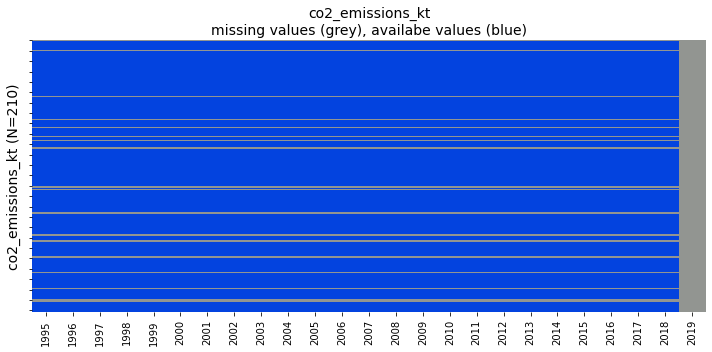

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


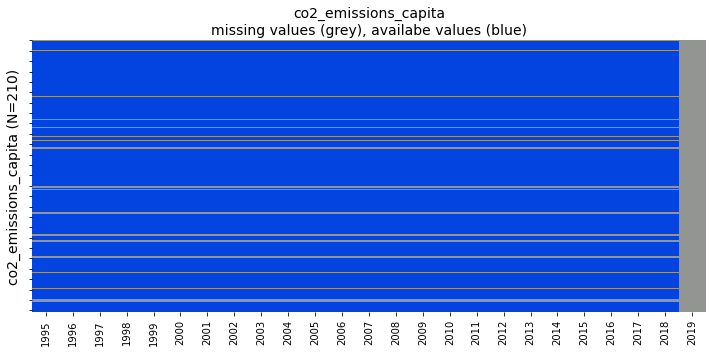

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


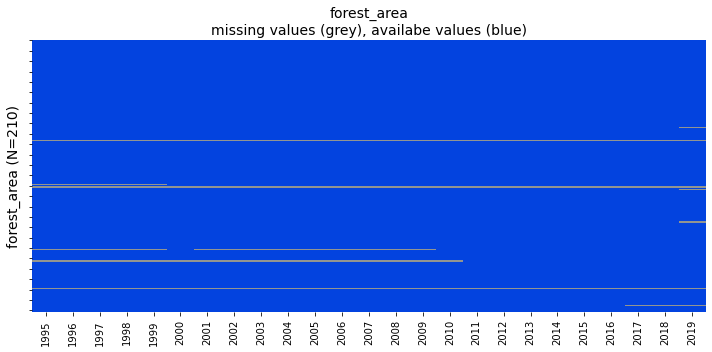

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


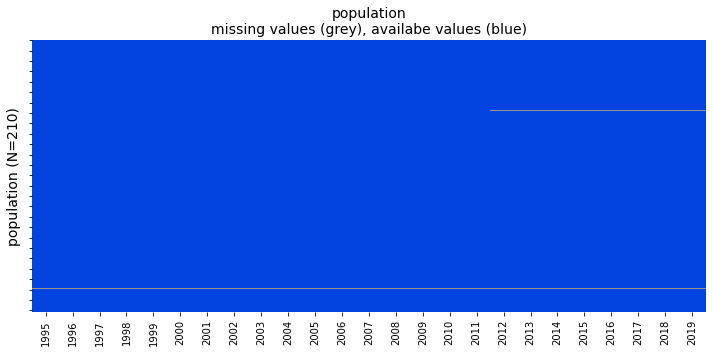

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


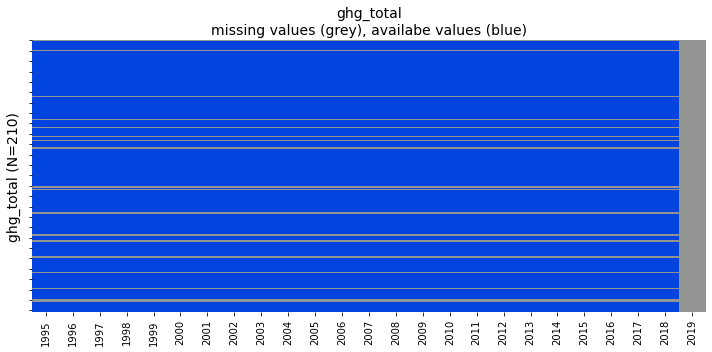

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


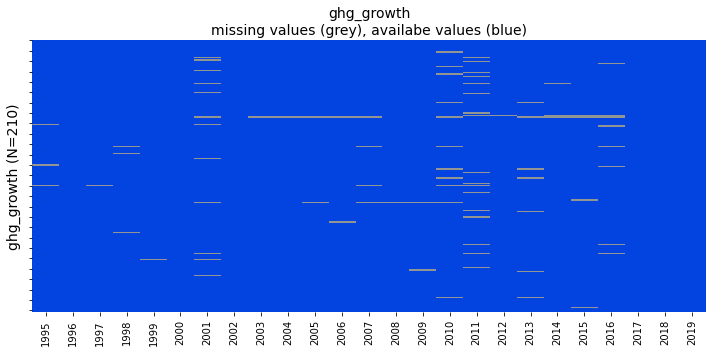

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


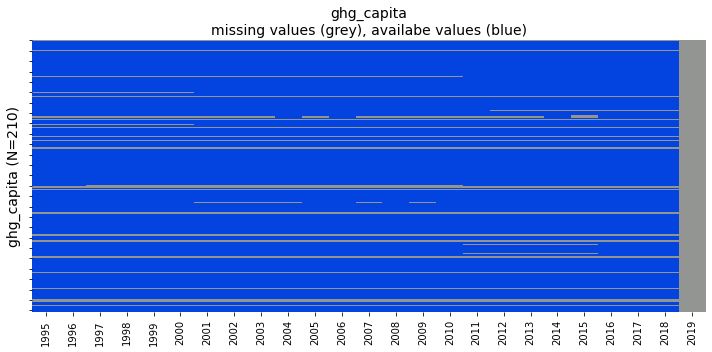

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


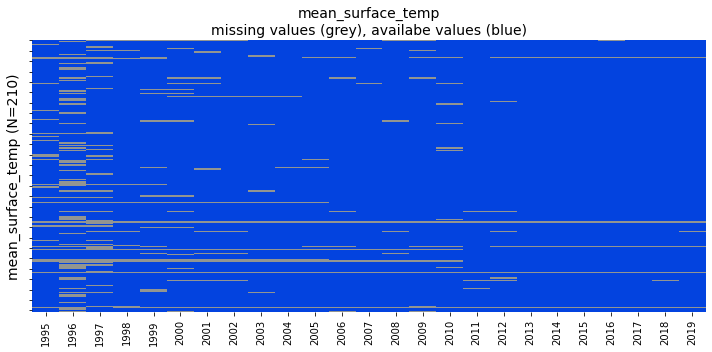

None


In [13]:
for col in climate_data.columns[3:]:
    print(missing_values_graph(climate_data, "iso_code", "year", col, col))

### Exploring economic data

In [14]:
economic_data.head()

,country,iso_code,year,gdp_constant_change,gdp_capita,vol_imports_change,vol_exports_change,population,gdp_current,energy_usage,imports_gns,exports_gns
0,Afghanistan,AFG,1995,,,,,,,,,
1,Albania,ALB,1995,8.9,4582.93,0.0,,3.188,9.643,417.034843,,
2,Algeria,DZA,1995,3.848,8158.72,2.0,5.733,28.06,204.348,843.041996,16590532511.0,33084611492.0
3,Angola,AGO,1995,10.364,3973.12,27.968,12.24,14.771,37.582,455.666087,,
4,Antigua and Barbuda,ATG,1995,-4.359,16127.97,,,0.067,0.909,,,


In [15]:
economic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              5070 non-null   object
 1   iso_code             5070 non-null   object
 2   year                 5070 non-null   int64 
 3   gdp_constant_change  5070 non-null   object
 4   gdp_capita           5070 non-null   object
 5   vol_imports_change   5070 non-null   object
 6   vol_exports_change   5070 non-null   object
 7   population           5070 non-null   object
 8   gdp_current          5070 non-null   object
 9   energy_usage         5070 non-null   object
 10  imports_gns          5070 non-null   object
 11  exports_gns          5070 non-null   object
dtypes: int64(1), object(11)
memory usage: 475.4+ KB


In [16]:
# convert string columns to numeric dtype
for col in economic_data.columns[3:]:
    economic_data[col]=pd.to_numeric(economic_data[col])
economic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              5070 non-null   object 
 1   iso_code             5070 non-null   object 
 2   year                 5070 non-null   int64  
 3   gdp_constant_change  4932 non-null   float64
 4   gdp_capita           4926 non-null   float64
 5   vol_imports_change   4399 non-null   float64
 6   vol_exports_change   4425 non-null   float64
 7   population           4948 non-null   float64
 8   gdp_current          4957 non-null   float64
 9   energy_usage         2851 non-null   float64
 10  imports_gns          3730 non-null   float64
 11  exports_gns          3730 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 475.4+ KB


In [17]:
percent_missing = economic_data.isnull().sum() * 100 / len(climate_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
country,0.000000
iso_code,0.000000
year,0.000000
gdp_constant_change,2.628571
gdp_capita,2.742857
vol_imports_change,12.780952
vol_exports_change,12.285714
population,2.323810
gdp_current,2.152381
energy_usage,42.266667


In [18]:
economic_data.shape

(5070, 12)

In [19]:
perc = 35.0
min_count =  int(((100-perc)/100)*economic_data.shape[0] + 1)
economic_data = economic_data.dropna(axis = 1, thresh = min_count)
economic_data.shape

(5070, 11)

In [20]:
s1 = climate_data.iso_code.unique().tolist()
s2 = economic_data.iso_code.unique().tolist()
## countries in economic data that are not in climate data
set(s1).difference(s2)

{'AND',
 'ASM',
 'CUB',
 'CYM',
 'FRO',
 'GIB',
 'GRL',
 'IMN',
 'LIE',
 'MCO',
 'NCL',
 'PRK',
 'PSE',
 'PYF',
 'TCA',
 'VGB',
 'VIR',
 'WLD'}

<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


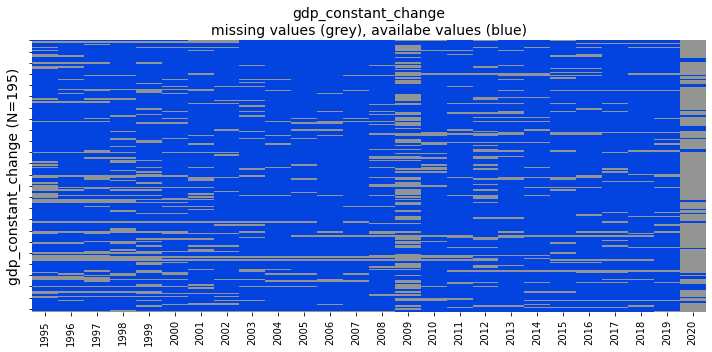

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


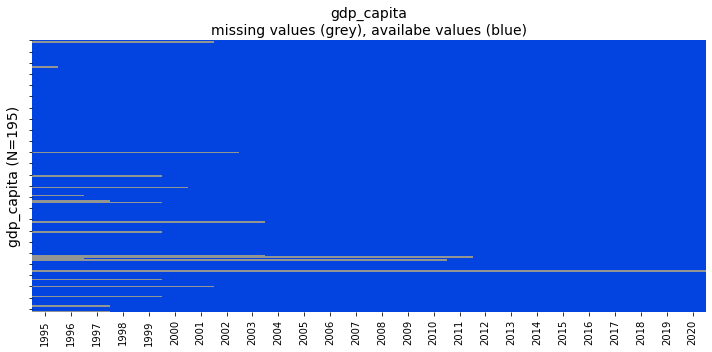

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


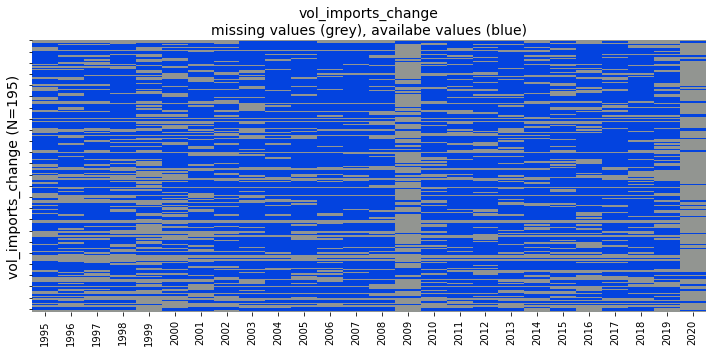

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


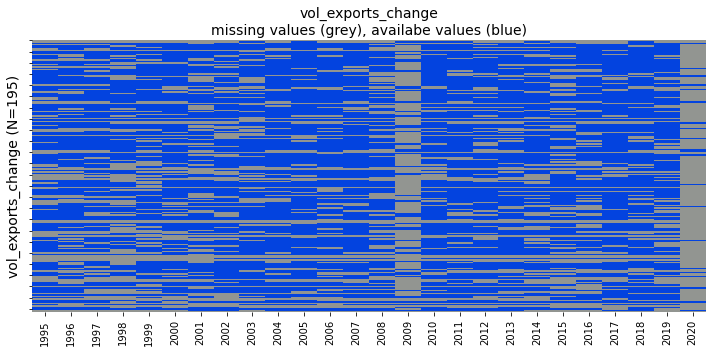

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


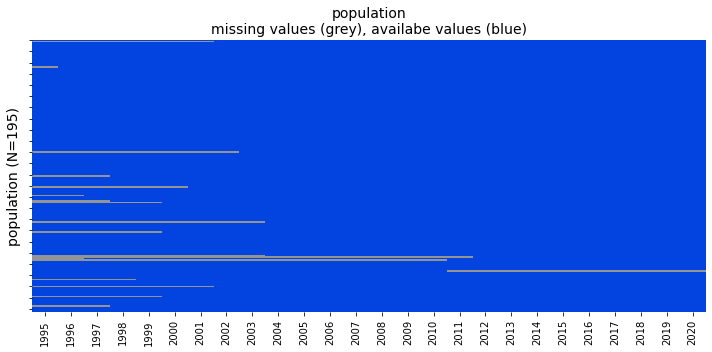

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


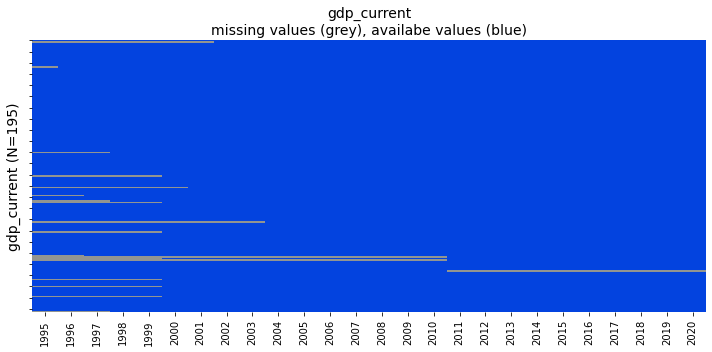

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


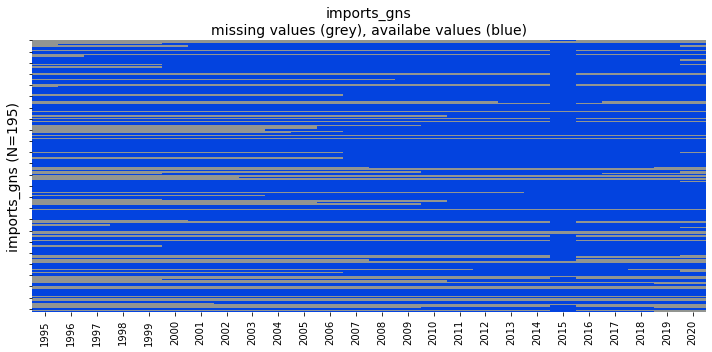

None


<ipython-input-12-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


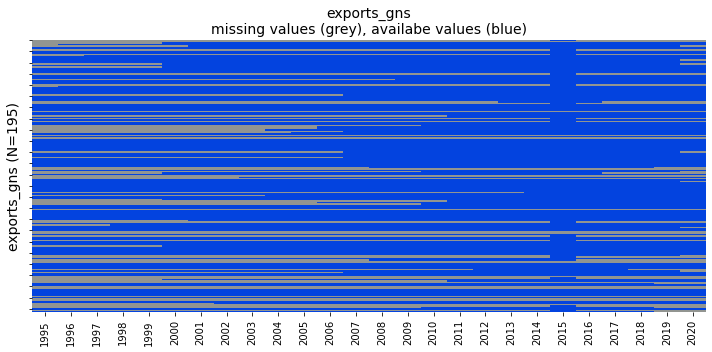

None


In [21]:
for col in economic_data.columns[3:]:
    print(missing_values_graph(economic_data, "iso_code", "year", col, col))

# Selecting Countries for Region Specific Analysis

We want to keep countries for which we have enough data to perform further analysis. We start by looking at the percentage of missing values for each country, and ddrop the countries for which this proportion is greater than 35%. 

In [22]:
region_mapping.region.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas', ''],
      dtype=object)

In [23]:
region_mapping.head()

,country,iso_code,region,sub_region,intermediate_region
0,Afghanistan,AFG,Asia,Southern Asia,
1,√Öland Islands,ALA,Europe,Northern Europe,
2,Albania,ALB,Europe,Southern Europe,
3,Algeria,DZA,Africa,Northern Africa,
4,American Samoa,ASM,Oceania,Polynesia,


In [24]:
combined_data = pd.merge(economic_data, climate_data, on = ["iso_code", "year", "country"], how = "left")

# Pooled OLS

In [25]:
#merged climate data and economic data
data = pd.merge(economic_data, climate_data, on = ["iso_code", "year", "country"], how = "left")

In [26]:
data["log_ghg_capita"] = np.log(data["ghg_capita"])
data["log_gdp_capita"] = np.log(pd.to_numeric(data["gdp_capita"]))
data["log_gdp_capita_sq"] = (np.log(pd.to_numeric(data["gdp_capita"])))**2

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
data.columns

Index(['country', 'iso_code', 'year', 'gdp_constant_change', 'gdp_capita',
       'vol_imports_change', 'vol_exports_change', 'population_x',
       'gdp_current', 'imports_gns', 'exports_gns', 'co2_emissions_kt',
       'co2_emissions_capita', 'forest_area', 'population_y', 'ghg_total',
       'ghg_growth', 'ghg_capita', 'mean_surface_temp', 'log_ghg_capita',
       'log_gdp_capita', 'log_gdp_capita_sq'],
      dtype='object')

In [28]:
# Perform PooledOLS
data['year'] = pd.to_datetime(data['year'], format='%Y')
# #add column year to index
data = data.set_index('year', append=True)

In [29]:
#exog = sm.tools.tools.add_constant(data["log_gdp_capita"])
exog = sm.tools.tools.add_constant(data.filter(["log_gdp_capita", "log_gdp_capita_sq", "vol_exports_change", "vol_imports_change", "mean_surface_temp"], axis = 1))
endog = data["log_ghg_capita"]
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

/home/kaveri/.local/lib/python3.8/site-packages/linearmodels/shared/exceptions.py:37: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [30]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:         log_ghg_capita   R-squared:                        0.4299
Estimator:                  PooledOLS   R-squared (Between):              0.4299
No. Observations:                3495   R-squared (Within):               0.0000
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.4299
Time:                        21:17:28   Log-likelihood                   -3747.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      526.22
Entities:                        3495   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                  F(5,3489)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             576.89
                            

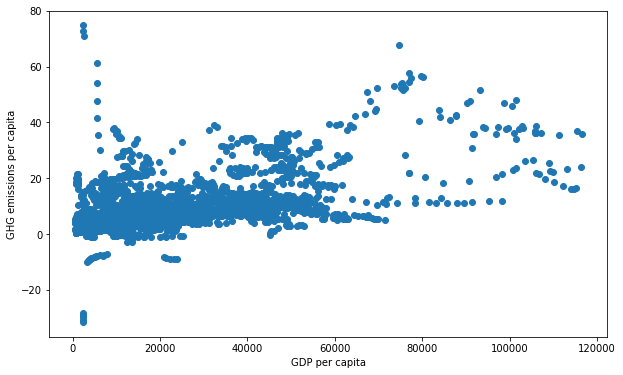

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['gdp_capita'], y = data['ghg_capita'])
plt.xlabel("GDP per capita")
plt.ylabel("GHG emissions per capita")
plt.show()

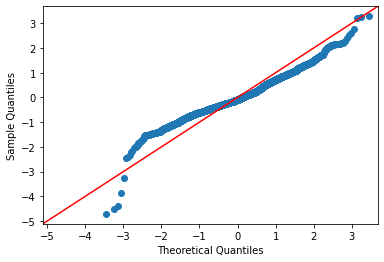

In [32]:
#QQPlot to check for normality
sm.qqplot(residuals_pooled_OLS, line='45')
plt.show()

The plot shows that the residuals of the plot are not normalaly distributed. Even though the residual errors are not normally distributed, the Pooled OLS estimator is still the Best Linear Unbiased Estimator (BLUE) for the panel data regression problem. Non-normality of residual errors does not affect the BLUE-ness of OLS regression model.

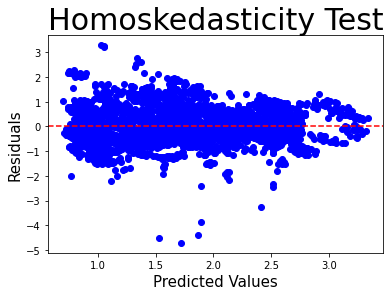

In [33]:
#  Homoskedasticity
# Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

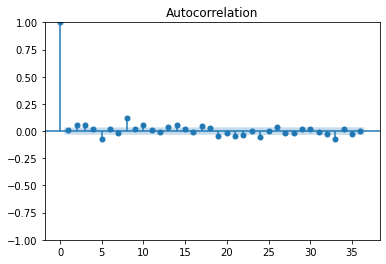

In [34]:
#check for autocorrelation
import statsmodels.graphics.tsaplots as tsap
tsap.plot_acf(x=residuals_pooled_OLS)
plt.show()

The perfect correlation of 1.0 at lag 0 is to be ignored as a number is always perfectly correlated with itself. But we see significant auto-correlation between residual errors at lags 1, 2 and 3.

# Fixed Effects Regression

In [35]:
data2 = pd.merge(economic_data, climate_data, on = ["iso_code", "year", "country"], how = "left")
data2["log_ghg_capita"] = np.log(data2["ghg_capita"])
data2["log_gdp_capita"] = np.log(pd.to_numeric(data2["gdp_capita"]))
data2["log_gdp_capita_sq"] = (np.log(pd.to_numeric(data2["gdp_capita"])))**2

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
data2.columns

Index(['country', 'iso_code', 'year', 'gdp_constant_change', 'gdp_capita',
       'vol_imports_change', 'vol_exports_change', 'population_x',
       'gdp_current', 'imports_gns', 'exports_gns', 'co2_emissions_kt',
       'co2_emissions_capita', 'forest_area', 'population_y', 'ghg_total',
       'ghg_growth', 'ghg_capita', 'mean_surface_temp', 'log_ghg_capita',
       'log_gdp_capita', 'log_gdp_capita_sq'],
      dtype='object')

In [37]:
#Imputing missing data using KNNImputer for the entire column
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X = data2.iloc[:,3:]
X = imputer.fit_transform(X)
X
X.shape

(5070, 19)

In [61]:
data2["iso_code"].unique()
data2[data2["iso_code"] == "AFG"].iloc[:,3:]

,gdp_constant_change,gdp_capita,vol_imports_change,vol_exports_change,population_x,gdp_current,imports_gns,exports_gns,co2_emissions_kt,co2_emissions_capita,forest_area,population_y,ghg_total,ghg_growth,ghg_capita,mean_surface_temp,log_ghg_capita,log_gdp_capita,log_gdp_capita_sq
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250.0,0.069020,1.850994,18110662.0,13480.0,1.88,0.61,0.401,-0.494296,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1180.0,0.062588,1.850994,18853444.0,14440.0,8.67,0.64,-0.064,-0.446287,NaN,NaN
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100.0,0.056827,1.850994,19357126.0,15340.0,7.51,0.67,0.409,-0.400478,NaN,NaN
585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050.0,0.053197,1.850994,19737770.0,16100.0,5.81,0.69,0.585,-0.371064,NaN,NaN
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,820.0,0.040653,1.850994,20170847.0,16910.0,5.98,0.72,1.192,-0.328504,NaN,NaN
975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770.0,0.037055,1.850994,20779957.0,15080.0,-12.66,0.61,1.039,-0.494296,NaN,NaN
1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810.0,0.037488,1.850994,21606992.0,13490.0,7.26,0.63,1.355,-0.462035,NaN,NaN
1365,NaN,1442.77,NaN,NaN,18.707,19.677,NaN,NaN,1100.0,0.048671,1.850994,22600774.0,16090.0,19.13,0.72,1.361,-0.328504,7.274320,52.915734
1560,8.692,1506.22,37.300,49.262,19.477,21.784,NaN,NaN,1350.0,0.057008,1.850994,23680871.0,16780.0,4.24,0.71,0.632,-0.342490,7.317358,53.543735
1755,0.671,1459.35,1.403,-5.861,20.237,22.521,NaN,NaN,1130.0,0.045700,1.850994,24726689.0,16520.0,-1.55,0.67,1.370,-0.400478,7.285746,53.082101


In [55]:
for country in data2["iso_code"].unique():
    df = data2[data2["iso_code"] == country]
    imputer = KNNImputer(n_neighbors=2)
    X = df.iloc[:,3:]
    out = imputer.fit_transform(X)

,country,iso_code,year,gdp_constant_change,gdp_capita,vol_imports_change,vol_exports_change,population_x,gdp_current,imports_gns,...,co2_emissions_capita,forest_area,population_y,ghg_total,ghg_growth,ghg_capita,mean_surface_temp,log_ghg_capita,log_gdp_capita,log_gdp_capita_sq
0,Afghanistan,AFG,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.069020,1.850994,18110662.0,13480.0,1.88,0.61,0.401,-0.494296,NaN,NaN
195,Afghanistan,AFG,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.062588,1.850994,18853444.0,14440.0,8.67,0.64,-0.064,-0.446287,NaN,NaN
390,Afghanistan,AFG,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.056827,1.850994,19357126.0,15340.0,7.51,0.67,0.409,-0.400478,NaN,NaN
585,Afghanistan,AFG,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.053197,1.850994,19737770.0,16100.0,5.81,0.69,0.585,-0.371064,NaN,NaN
780,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.040653,1.850994,20170847.0,16910.0,5.98,0.72,1.192,-0.328504,NaN,NaN
975,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.037055,1.850994,20779957.0,15080.0,-12.66,0.61,1.039,-0.494296,NaN,NaN
1170,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.037488,1.850994,21606992.0,13490.0,7.26,0.63,1.355,-0.462035,NaN,NaN
1365,Afghanistan,AFG,2002,NaN,1442.77,NaN,NaN,18.707,19.677,NaN,...,0.048671,1.850994,22600774.0,16090.0,19.13,0.72,1.361,-0.328504,7.274320,52.915734
1560,Afghanistan,AFG,2003,8.692,1506.22,37.300,49.262,19.477,21.784,NaN,...,0.057008,1.850994,23680871.0,16780.0,4.24,0.71,0.632,-0.342490,7.317358,53.543735
1755,Afghanistan,AFG,2004,0.671,1459.35,1.403,-5.861,20.237,22.521,NaN,...,0.045700,1.850994,24726689.0,16520.0,-1.55,0.67,1.370,-0.400478,7.285746,53.082101


In [47]:
# Imputing missing data grouped by countries
def impute_missing_values(df):
    imputer = KNNImputer(n_neighbors=2)
    X = df.iloc[:,3:]
    out = imputer.fit_transform(X)
    # print("length of the output",X.shape[1])
    # print("len of output", len(out[1]) )
    # if X.shape[1] == len(out[1]): # we should have the same 
    return out

res = data2.groupby(["iso_code", "country"], as_index = False).apply(impute_missing_values)

In [63]:
res[1]

array([[ 4.68150000e+00,  1.47449500e+03,  1.93515000e+01,
         2.17005000e+01,  1.90920000e+01,  2.07305000e+01,
         1.25000000e+03,  6.90201164e-02,  1.85099409e+00,
         1.81106620e+07,  1.34800000e+04,  1.88000000e+00,
         6.10000000e-01,  4.01000000e-01, -4.94296322e-01,
         7.29583932e+00,  5.32297344e+01],
       [ 4.68150000e+00,  1.47449500e+03,  1.93515000e+01,
         2.17005000e+01,  1.90920000e+01,  2.07305000e+01,
         1.18000000e+03,  6.25880343e-02,  1.85099409e+00,
         1.88534440e+07,  1.44400000e+04,  8.67000000e+00,
         6.40000000e-01, -6.40000000e-02, -4.46287103e-01,
         7.29583932e+00,  5.32297344e+01],
       [ 4.68150000e+00,  1.47449500e+03,  1.93515000e+01,
         2.17005000e+01,  1.90920000e+01,  2.07305000e+01,
         1.10000000e+03,  5.68266178e-02,  1.85099409e+00,
         1.93571260e+07,  1.53400000e+04,  7.51000000e+00,
         6.70000000e-01,  4.09000000e-01, -4.00477567e-01,
         7.29583932e+00,  5.3

In [51]:
for i in res[1]:
    print(i)

[ 4.68150000e+00  1.47449500e+03  1.93515000e+01  2.17005000e+01
  1.90920000e+01  2.07305000e+01  1.25000000e+03  6.90201164e-02
  1.85099409e+00  1.81106620e+07  1.34800000e+04  1.88000000e+00
  6.10000000e-01  4.01000000e-01 -4.94296322e-01  7.29583932e+00
  5.32297344e+01]
[ 4.68150000e+00  1.47449500e+03  1.93515000e+01  2.17005000e+01
  1.90920000e+01  2.07305000e+01  1.18000000e+03  6.25880343e-02
  1.85099409e+00  1.88534440e+07  1.44400000e+04  8.67000000e+00
  6.40000000e-01 -6.40000000e-02 -4.46287103e-01  7.29583932e+00
  5.32297344e+01]
[ 4.68150000e+00  1.47449500e+03  1.93515000e+01  2.17005000e+01
  1.90920000e+01  2.07305000e+01  1.10000000e+03  5.68266178e-02
  1.85099409e+00  1.93571260e+07  1.53400000e+04  7.51000000e+00
  6.70000000e-01  4.09000000e-01 -4.00477567e-01  7.29583932e+00
  5.32297344e+01]
[ 4.68150000e+00  1.47449500e+03  1.93515000e+01  2.17005000e+01
  1.90920000e+01  2.07305000e+01  1.05000000e+03  5.31974990e-02
  1.85099409e+00  1.97377700e+07  1.

In [50]:
df = pd.DataFrame(res[1], columns = data2.columns[3:])
df

ValueError: Shape of passed values is (26, 17), indices imply (26, 19)

In [37]:
# df = pd.DataFrame(X, columns = data.columns[3:])
# df

Text(23, 45, '$\\mu=15, b=3$')

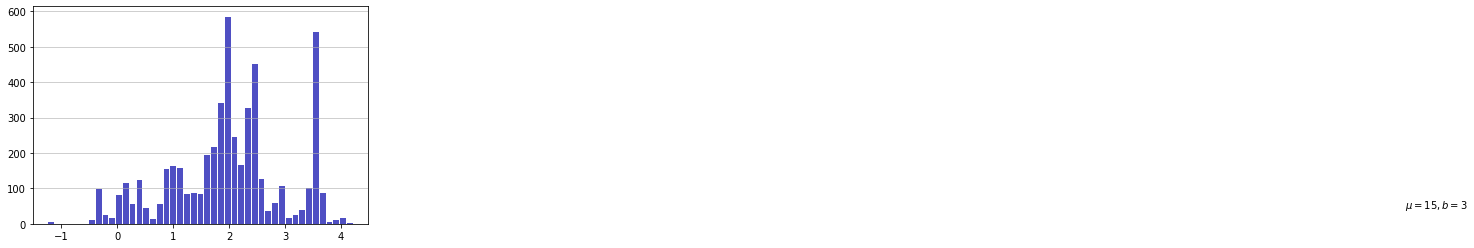

In [41]:
n, bins, patches = plt.hist(x=df["log_ghg_capita"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.text(23, 45, r'$\mu=15, b=3$')

Text(23, 45, '$\\mu=15, b=3$')

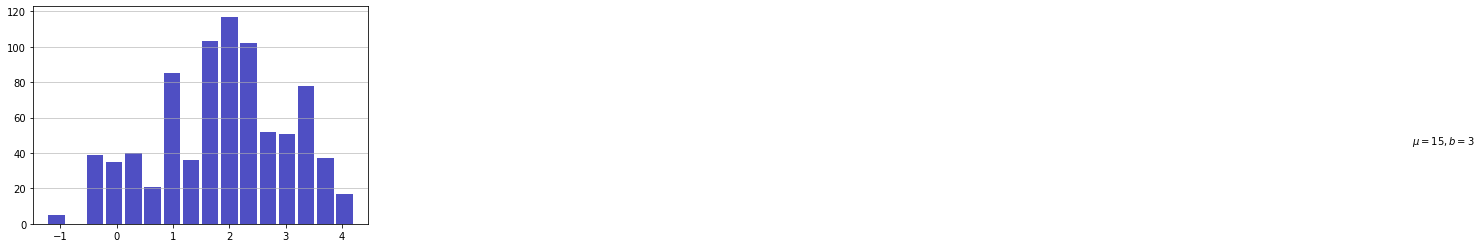

In [39]:
n, bins, patches = plt.hist(x=data["log_ghg_capita"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.text(23, 45, r'$\mu=15, b=3$')

In [44]:
#fixed effects regression
df["year"] = economic_data["year"]
exog_vars = ["log_gdp_capita", "log_gdp_capita_sq","forest_area", "vol_exports_change", "vol_imports_change"] + np.unique(df.year)[1::].tolist()
df['year'] = pd.to_datetime(df['year'], format='%Y')
df=df.set_index('year', append=True)
exog = sm.tools.tools.add_constant(df.filter(exog_vars, axis = 1))
endog = df["log_ghg_capita"]
mod_fe = PanelOLS(endog, exog)
fe_res = mod_fe.fit()
print(fe_res)

ValueError: DataFrame input must have a MultiIndex with 2 levels

In [101]:
exog

,,const,log_gdp_capita,log_gdp_capita_sq,forest_area
,year,,,,
0,1995-01-01,1.0,7.483302,55.999908,1.850994
1,1995-01-01,1.0,8.430094,71.066482,28.432482
2,1995-01-01,1.0,9.006843,81.123213,0.681435
3,1995-01-01,1.0,8.287307,68.679457,62.954757
4,1995-01-01,1.0,9.688310,93.863357,22.227273
...,...,...,...,...,...
5065,2020-01-01,1.0,9.240187,85.381047,18.439218
5066,2020-01-01,1.0,8.538489,72.905791,50.091640
5067,2020-01-01,1.0,7.510420,56.406403,48.011619


In [45]:
#merged climate data and economic data- making year dummies for fixed effects
data2 = pd.merge(economic_data, climate_data, on = ["iso_code", "year", "country"], how = "left")
data2 = pd.concat([data2, pd.get_dummies(data2.year, drop_first=True)], axis=1)
exog_vars = ["log_gdp_capita", "log_gdp_capita_sq"] + np.unique(data2.year)[1::].tolist()
data2['year'] = pd.to_datetime(data2['year'], format='%Y')
# #add column year to index
data2 = data2.set_index('year', append=True)


In [46]:
exog = sm.tools.tools.add_constant(data.filter(exog_vars, axis = 1))

In [47]:
exog2 = exog.copy()
exog2 = exog2 - exog2.groupby(level=0).transform('mean') + exog2.mean()
# for col in exog2:
#     print(col, sm.OLS(exog2[col], exog2.drop(columns=col)).fit().rsquared)
exog2.columns

Index(['const', 'log_gdp_capita', 'log_gdp_capita_sq'], dtype='object')

In [48]:
data2["log_ghg_capita"] = np.log(data2["ghg_capita"])
data2["log_gdp_capita"] = np.log(pd.to_numeric(data2["gdp_capita"]))
data2["log_gdp_capita_sq"] = (np.log(pd.to_numeric(data2["gdp_capita"])))**2

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
#`fixed effects- , entity_effects = True, time_effects = True, check_rank=False
endog = data2["log_ghg_capita"]
mod_fe = PanelOLS(endog, exog2)
fe_res = mod_fe.fit()
print(fe_res)

ValueError: dependent and exog must have the same number of observations. The number of observations in dependent is 5070, and the number of observations in exog is 15210.

In [48]:
# exog = sm.tools.tools.add_constant(data.filter(["log_gdp_capita", "log_gdp_capita_sq"], axis = 1))
# endog = data["log_ghg_capita"]
# # random effects model
# model_re = RandomEffects(endog, exog) 
# re_res = model_re.fit() 
# # fixed effects model
# model_fe = PanelOLS(endog, exog, entity_effects = True) 
# fe_res = model_fe.fit() 
# #print results
# print(re_res)
# print(fe_res)

In [ ]:
#Fixed Effects Regression with Imputed Data
def fe_model(data, explanatory_varaibles):
    